In [1]:
#STEP - 1
import pandas as pd
df = pd.read_csv('mcdonalds.csv')
print(df.shape)
print(df.columns)
df.head()

(1453, 15)
Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [2]:
#STEP - 2
X = df.iloc[:, 0:11]
X_binary = X.applymap(lambda x: 1 if x == 'Yes' else 0)
X_binary.head()

C:\Users\YASHRAJ\AppData\Local\Temp\ipykernel_7512\22685640.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_binary = X.applymap(lambda x: 1 if x == 'Yes' else 0)


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


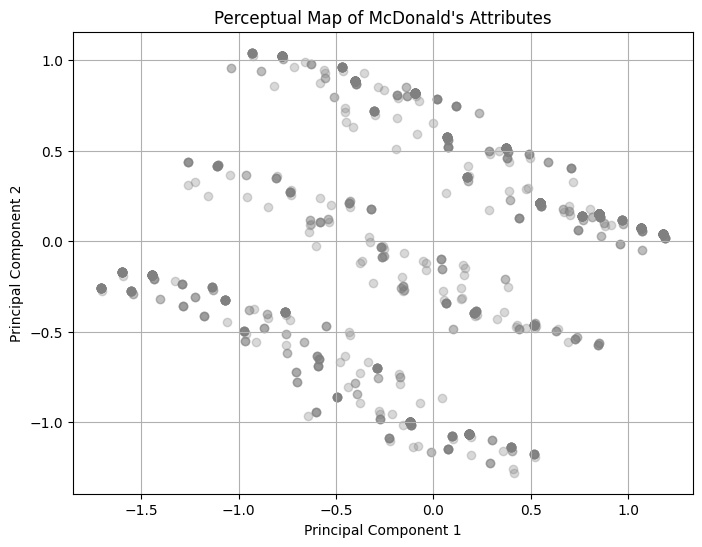

In [3]:
#STEP - 3
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
components = pca.fit_transform(X_binary)
plt.figure(figsize=(8,6))
plt.scatter(components[:,0], components[:,1], alpha=0.3, c='gray')
plt.title("Perceptual Map of McDonald's Attributes")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

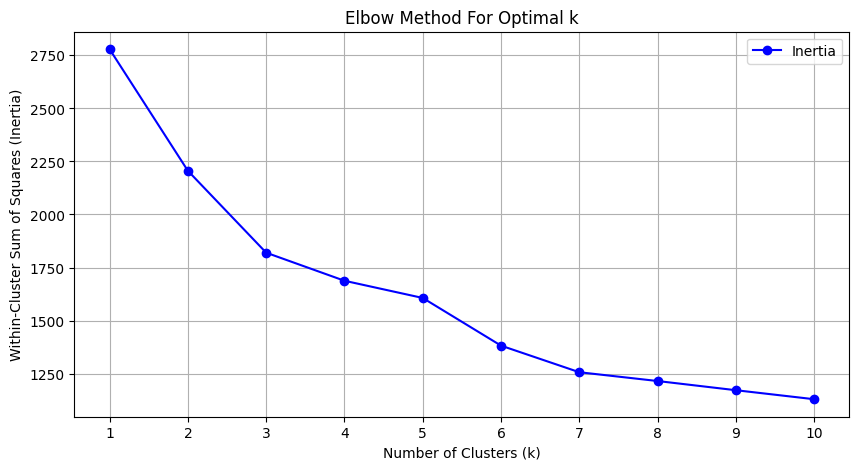

In [4]:
#STEP -  4
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
k_range = range(1, 11)
inertia = []
sil_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_binary)
    inertia.append(kmeans.inertia_)
    if k > 1:
        sil = silhouette_score(X_binary, kmeans.labels_)
        sil_scores.append(sil)
    else:
        sil_scores.append(None)
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, 'bo-', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.legend()
plt.show()

In [5]:
#STEP - 5
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=123)
df['Segment'] = kmeans.fit_predict(X_binary)
df['Segment'].value_counts()

Segment
1    531
3    470
2    306
0    146
Name: count, dtype: int64

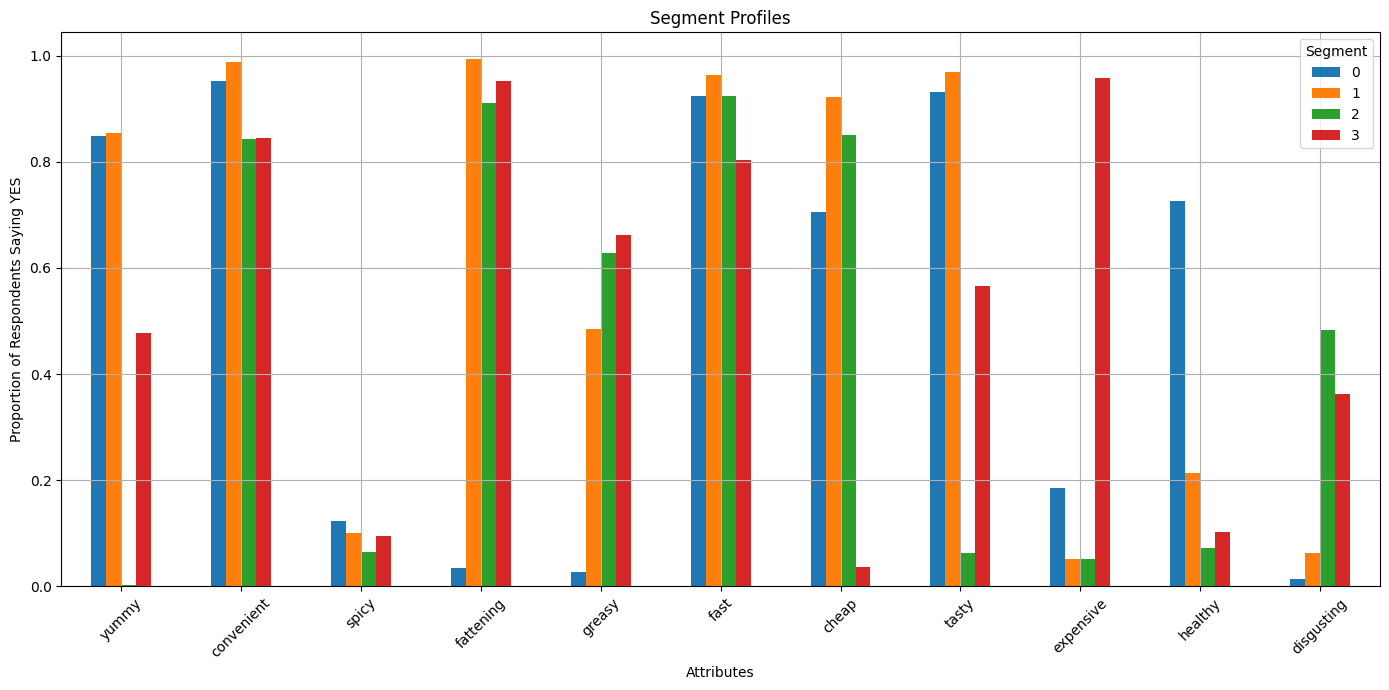

In [6]:
#STEP - 6
import seaborn as sns
profile_data = X_binary.copy()
profile_data['Segment'] = df['Segment']
segment_profiles = profile_data.groupby('Segment').mean().T
segment_profiles.plot(kind='bar', figsize=(14,7))
plt.title('Segment Profiles')
plt.ylabel('Proportion of Respondents Saying YES')
plt.xlabel('Attributes')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

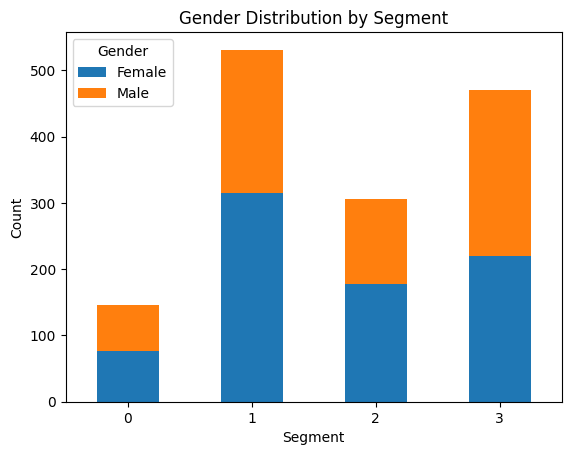

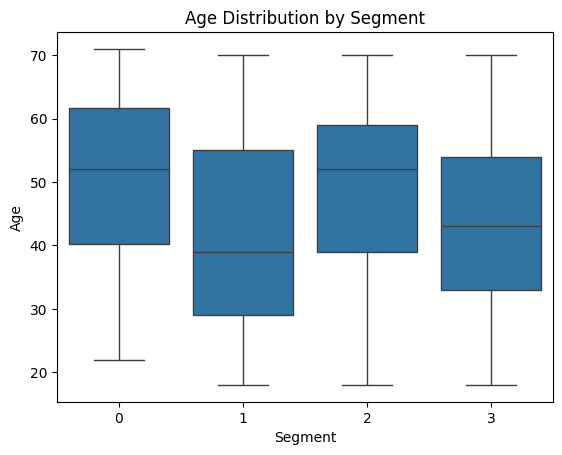

In [7]:
# Gender distribution across segments
pd.crosstab(df['Segment'], df['Gender']).plot(kind='bar', stacked=True)
plt.title('Gender Distribution by Segment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
sns.boxplot(x='Segment', y='Age', data=df)
plt.title('Age Distribution by Segment')
plt.show()

In [22]:
#STEP - 7
# Run KMeans with optimal number of clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Segment'] = kmeans.fit_predict(X_binary)

In [23]:
#STEP - 8
from sklearn.metrics import silhouette_score

# Calculate silhouette score for the final clustering
final_silhouette = silhouette_score(X_binary, df['Segment'])
print(f"Silhouette Score for k={optimal_k}: {final_silhouette:.4f}")

Silhouette Score for k=4: 0.2292


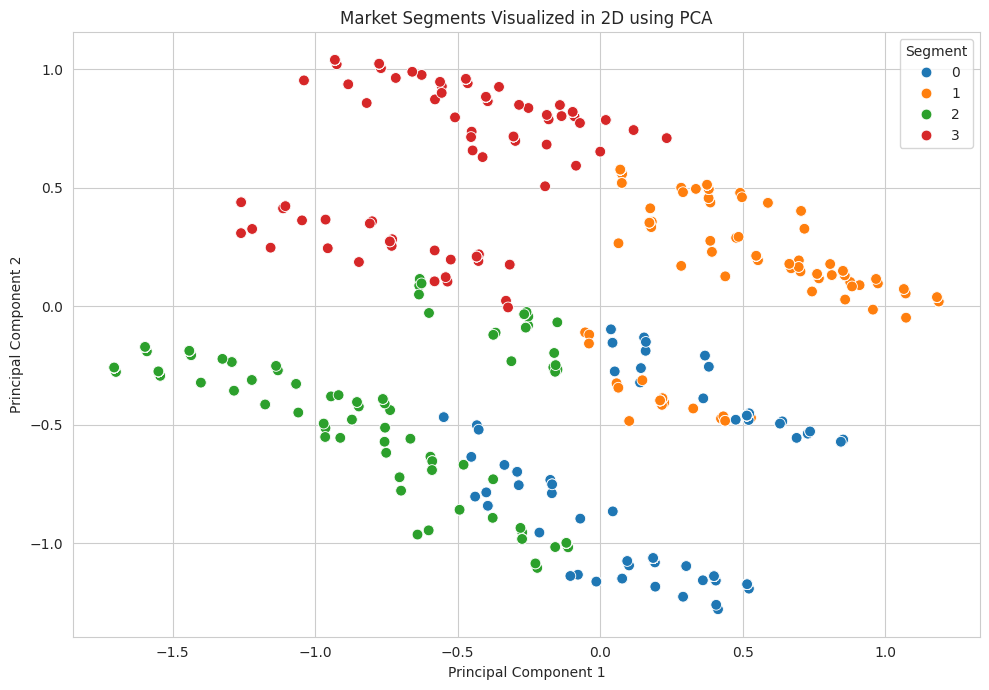

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2 principal components for visualization
pca = PCA(n_components=2)
components = pca.fit_transform(X_binary)

# Add PCA components to DataFrame for plotting
df['PCA1'] = components[:, 0]
df['PCA2'] = components[:, 1]

# Plot PCA scatterplot colored by Segment
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Segment', palette='tab10', s=60)
plt.title('Market Segments Visualized in 2D using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Features and labels
X = X_binary
y = df['Segment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)

# Evaluation results
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        63
           1       0.99      1.00      0.99       169
           2       1.00      0.99      1.00       105
           3       1.00      0.97      0.98        99

    accuracy                           0.99       436
   macro avg       0.99      0.99      0.99       436
weighted avg       0.99      0.99      0.99       436

Confusion Matrix:
 [[ 63   0   0   0]
 [  0 169   0   0]
 [  1   0 104   0]
 [  1   2   0  96]]


In [ ]:
# McDonald’s Market Segmentation Analysis (Python)

This canvas contains the **complete project layout** and **Jupyter Notebook outline** with **inline comments** so you can run, follow, and replicate every step.

---

## 📁 Project directory

```
mcd_segmentation/
├── data/
│   └── mcd_data.csv           ← your tab-separated McDonald’s dataset
├── notebooks/
│   └── 01_market_segmentation.ipynb   ← the main analysis notebook
├── requirements.txt           ← Python dependencies
└── README.md                  ← project overview & run instructions
```

### requirements.txt

```text
pandas
numpy
scikit-learn
matplotlib
seaborn
scipy
```

---

## 📓 notebooks/01\_market\_segmentation.ipynb

Open in JupyterLab or VSCode and **run cells sequentially**.

### **1. Environment Setup & Data Load**

```python
# — Cell 1: IMPORT libraries & configure plotting
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# Inline plots & style
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8,5)
```

```python
# — Cell 2: LOAD data from CSV into DataFrame & show top rows
# Use tab separator and strip whitespace from col names to avoid KeyErrors

df = pd.read_csv('../data/mcd_data.csv', sep='\t')
df.columns = df.columns.str.strip()
print("Columns loaded:", df.columns.tolist())
df.head()
```

### **2. Step 1: Decide to Segment**

```markdown
> **Cell 3 (Markdown):**
> **Step 1: Decide (Not) to Segment**
> - Document business rationale (e.g., diverse tastes).
> - Note barriers (data quality, cost of campaigns).
> *(No code here.)*
```

---

### **3. Step 2: Specify Ideal Target Segment**

```markdown
> **Cell 4 (Markdown):**
> **Step 2: Specify Ideal Target Segment**
> - **Knock-out**: Visit ≥ once/month & LikeScore ≥ +3
> - **Attractiveness**: Age 18–35, rates “tasty” & “cheap” = Yes
> - Summarize “ideal” customer profile.
```

---

### **4. Step 3: Collect & Clean Data**

```python
# — Cell 5: CLEAN & engineer features
# 1) Confirm columns
print("Before cleaning, cols=", df.columns.tolist())

# 2) Identify Like column
like_col = 'Like'
if like_col not in df.columns:
    for alt in df.columns:
        if 'Like' in alt:
            like_col = alt
            break
print(f"Using column: {like_col}")

# 3) Extract numeric LikeScore
df['LikeScore'] = df[like_col].astype(str).str.extract(r'([+-]?\d+)').astype(int)

# 4) Convert Yes/No adjectives → 1/0
bin_cols = ['yummy','convenient','spicy','fattening','greasy',
            'fast','cheap','tasty','expensive','healthy','disgusting']
df[bin_cols] = df[bin_cols].apply(lambda col: col.str.strip().str.lower().map({'yes':1,'no':0}))

# 5) One-hot encode VisitFrequency & Gender
encoder = OneHotEncoder(sparse=False, drop='first')
ohe_arr = encoder.fit_transform(df[['VisitFrequency','Gender']])
ohe_cols = encoder.get_feature_names_out(['VisitFrequency','Gender'])
for i, col in enumerate(ohe_cols):
    df[col] = ohe_arr[:,i]

# 6) Drop raw columns
drop_cols = [like_col,'VisitFrequency','Gender']
df.drop(columns=drop_cols, inplace=True)

# 7) Verify cleaning
print(df[['LikeScore'] + bin_cols + list(ohe_cols)].head())
```

---

### **5. Step 4: Explore Data**

```python
# — Cell 6: DATA QUALITY checks
df.info()
df.describe().T
df.isna().sum()
```

```python
# — Cell 7: VISUALIZE distributions
# Age
df['Age'].hist(bins=15)
plt.title('Age Distribution')
plt.xlabel('Age'); plt.ylabel('Count');

# LikeScore
df['LikeScore'].value_counts().sort_index().plot.bar()
plt.title('LikeScore Distribution')
plt.xlabel('Score'); plt.ylabel('Freq');
```

---

### **6. Step 4 (cont.): Pre-process & PCA**

```python
# — Cell 8: SCALE numeric features & run PCA
features = bin_cols + ['LikeScore','Age']
X = df[features].values

# 1) Standardize
t = StandardScaler()
X_scaled = t.fit_transform(X)

# 2) PCA (retain 80% variance)
pca = PCA(n_components=0.80, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 3) Scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('n components'); plt.ylabel('Cumulative variance');
plt.title('PCA Scree Plot');
```

---

### **7. Step 5: Extract Segments (k-Means)**

```python
# — Cell 9: K-MEANS elbow to choose k
inertia = []
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=42).fit(X_pca)
    inertia.append(km.inertia_)

plt.plot(range(1,11), inertia, 'o--')
plt.xlabel('k'); plt.ylabel('Inertia')
plt.title('Elbow Method for k-Means')
```

```python
# — Cell 10: FIT k-Means (e.g. k=4)
k_final = 4
km = KMeans(n_clusters=k_final, random_state=42).fit(X_pca)
df['Segment_kmeans'] = km.labels_
print(df['Segment_kmeans'].value_counts().sort_index())
```

---

### **8. Step 5: Extract Segments (Gaussian Mixture)**

```python
# — Cell 11: GMM BIC to choose n_components
bics = []
for k in range(1,11):
    gm = GaussianMixture(n_components=k, random_state=42).fit(X_pca)
    bics.append(gm.bic(X_pca))

plt.plot(range(1,11), bics, 'o--')
plt.xlabel('components'); plt.ylabel('BIC')
plt.title('GMM BIC Curve')
```

```python
# — Cell 12: FIT GMM
best_k = np.argmin(bics) + 1
gm = GaussianMixture(n_components=best_k, random_state=42).fit(X_pca)
df['Segment_gmm'] = gm.predict(X_pca)
print(f"Chosen GMM components: {best_k}")
print(df['Segment_gmm'].value_counts().sort_index())
```

---

### **9. Step 6: Profile Segments**

```python
# — Cell 13: PROFILE k-Means segments
profile_k = df.groupby('Segment_kmeans')[['LikeScore','Age'] + bin_cols].mean()
profile_k
```

```python
# — Cell 14: VISUALIZE “tasty” & “cheap” by segment
profile_k[['tasty','cheap']].plot.bar()
plt.title('Avg Tasty & Cheap by k-Means Segment')
plt.ylabel('Proportion');
```

---

### **10. Step 7: Describe Segments**

```python
# — Cell 15: STACKED bar of VisitFrequency by segment
ct = pd.crosstab(df['VisitFrequency'], df['Segment_kmeans'], normalize='columns')
ct.plot.bar(stacked=True)
plt.title('VisitFrequency by Segment')
plt.ylabel('Proportion');
```

```python
# — Cell 16: BOX PLOT of Age by segment
sns.boxplot(x='Segment_kmeans', y='Age', data=df)
plt.title('Age Distribution per Segment');
```

---

### **11. Steps 8 & 9: Target & Marketing Mix**

```markdown
> **Cell 17 (Markdown):**
> **Step 8: Select Target**
> - State which segment matches your “ideal” and why (e.g., Segment 2: high LikeScore, young).
>
> **Step 9: Customize 4Ps**
> - **Product**: Spicy Veggie Wrap for Segment 2
> - **Price**: Value combo deals
> - **Place**: Campus outlets & app coupons
> - **Promotion**: Social media + push notifications
```

---

### **12. Step 10: Evaluation & Monitoring**

```markdown
> **Cell 18 (Markdown):**
> **Step 10: KPIs & Stability**
> - **KPIs:** lift in visit frequency, avg. spend increase
> - **Stability:** re-run clustering every 3 months, track label changes
> - **Adjust:** repeat Steps 3–7 if segments drift.
```

---

### **13. Export Results**

```python
# — Cell 19: EXPORT segmented DataFrame to CSV for downstream use
df.to_csv('../data/mcd_data_segmented.csv', index=False)
print("Saved: mcd_data_segmented.csv")
```

---

## 🔄 How to run

1. **Clone** this repo.
2. Place your TSV in `data/mcd_data.csv`.
3. Install dependencies in one command:

   ```bash
   pip install pandas numpy scikit-learn matplotlib seaborn scipy
   ```
4. Launch JupyterLab or Notebook in VSCode:

   ```bash
   jupyter lab  # or jupyter notebook
   ```
5. Open **01\_market\_segmentation.ipynb** and **Run All**.

Every code cell above includes inline comments and follow-ups so even a beginner can understand *what* is happening and *why*.
